In [19]:
"""
随机森林进行回归。
"""

'\n随机森林进行回归。\n'

In [1]:
import numpy as np
import pandas as pd
train_input=np.loadtxt('train_input.txt',dtype=np.float32)
output=np.loadtxt('output.txt',dtype=np.float32)
data_train=pd.DataFrame(train_input)
data_output=pd.DataFrame(output)
data_train.describe()
data_output.describe()
data_train.columns=['A','B','C','D','E','F','G']
data_output.columns = ['Y']

In [3]:
"""
    交叉验证的划分
"""

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#data_train(全部数据) output(全部目标值)
#X_train训练集(全部特征) Y_train训练集的目标值
#test同理。
# 这里没有设置random
X_train, X_test, Y_train, Y_test = train_test_split(data_train,output, test_size=0.2,shuffle=False) #这里训练集75%:测试集25%
import numpy as np
from sklearn import ensemble
random_forest_regressor = ensemble.RandomForestRegressor()


"""2021/12/05"""
param_grid = {
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "n_estimators": [100, 300, 500, 700, 900, 1100],
    "max_features": ["auto", "sqrt", "log2"]
}
clf = GridSearchCV(random_forest_regressor, param_grid=param_grid)
# x=sm.add_constant(x)
x = data_train[['A','B','C','D','E','F','G']]
y = data_output[['Y']]
clf.fit(x, y)
print("best estimator ->", clf.best_estimator_)


F:\Python\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\Python\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Python\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "F:\Python\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "F:\Python\lib\site-packages\joblib\parallel.py", line 859

best estimator -> RandomForestRegressor(criterion='poisson', max_features='sqrt',
                      n_estimators=500)


(1596,)
MSE  -> 0.000902968029991833
RMSE -> 0.0300494264502974
0.0009898440998705558
0.026946983188597635


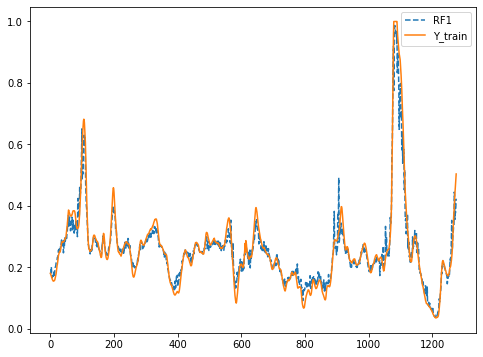

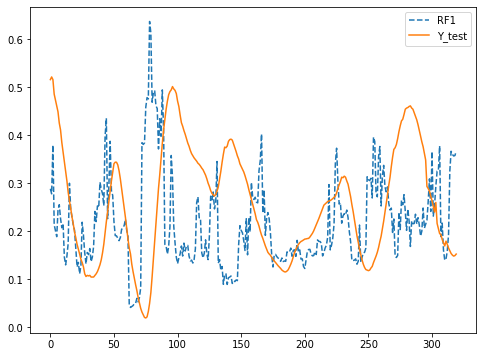

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#data_train(全部数据) output(全部目标值)
#X_train训练集(全部特征) Y_train训练集的目标值
#test同理。
# 这里没有设置random
X_train, X_test, Y_train, Y_test = train_test_split(data_train,output, test_size=0.2,shuffle=False) #这里训练集75%:测试集25%
import numpy as np
from sklearn import ensemble

random_forest_regressor = \
ensemble.RandomForestRegressor(criterion='poisson', \
max_features='sqrt', \
n_estimators=500)

x = data_train[['A','B','C','D','E','F','G']]
y_ori = data_output[['Y']]
y = []
for i in range(len(y_ori)):
    y.append(y_ori[y_ori.columns[0]][i])
print(np.shape(y))
L = random_forest_regressor.fit(x, y)
pred = L.predict(x)

# y_fitted, y
from sklearn import metrics
# data_pre = model.predict(X_test)
MSE = metrics.mean_squared_error(pred, y)
print("MSE  ->", MSE)
RMSE = metrics.mean_squared_error(pred, y)**0.5
print("RMSE ->", RMSE)


RF1 = random_forest_regressor.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error
Y_train_pred = RF1.predict(X_train)

Y_test_pred = RF1.predict(X_test)
Y_test = np.array(Y_test)
print(mean_squared_error(Y_train,Y_train_pred))
# 拟合
print(mean_squared_error(Y_test,Y_test_pred))
from matplotlib import pyplot as plt
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(Y_train_pred, '--', label='RF1')
ax1.plot(Y_train, '-',label='Y_train')
ax1.legend(loc='best')

fig2, ax2 = plt.subplots(figsize=(8,6))
ax2.plot(Y_test_pred, '--',label='RF1')
ax2.plot(Y_test, '-', label='Y_test')
ax2.legend(loc='best')


In [15]:
import numpy as np
from sklearn import ensemble
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
x = data_train[['A','B','C','D','E','F','G']]
y_ori = data_output[['Y']]
y = []
for i in range(len(y_ori)):
    y.append(y_ori[y_ori.columns[0]][i])
print(np.shape(y))
# x=sm.add_constant(x)

random_forest_regressor = \
ensemble.RandomForestRegressor(criterion='poisson', \
max_features='sqrt', \
n_estimators=500)

print(np.shape(y))

RF = random_forest_regressor.fit(x, y)
y_fitted = RF.predict(x)
scores = cross_val_score(RF,x,y)
scores.mean()

(1596,)
(1596,)


-1.2316139853734516

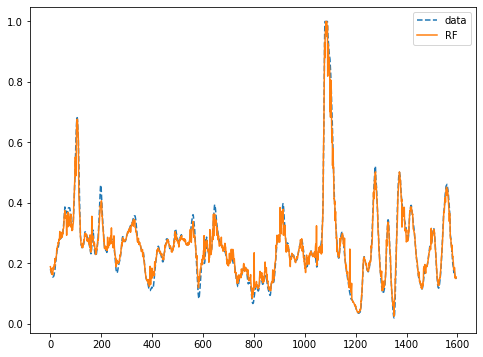

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_output, '--', label='data')
ax.plot(y_fitted, '-',label='RF')
ax.legend(loc='best')

In [16]:
test_input=np.loadtxt('test_input.txt',dtype=np.float32)
data_test=pd.DataFrame(test_input)
data_test.describe()

,0,1,2,3,4,5,6
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,0.317369,0.671641,0.635688,0.352175,0.591209,0.507335,0.470041
std,0.110661,0.090869,0.162876,0.142608,0.142461,0.122640,0.117860
min,0.040359,0.031766,0.174480,0.000282,0.001254,0.015904,0.010062
25%,0.258151,0.667573,0.545045,0.357026,0.531429,0.432439,0.396137
50%,0.305178,0.685803,0.625497,0.364650,0.619565,0.493633,0.466793
75%,0.360525,0.702688,0.749335,0.375342,0.690893,0.570895,0.535680
max,1.001941,0.782632,0.965611,1.133764,0.897153,0.926988,0.851098


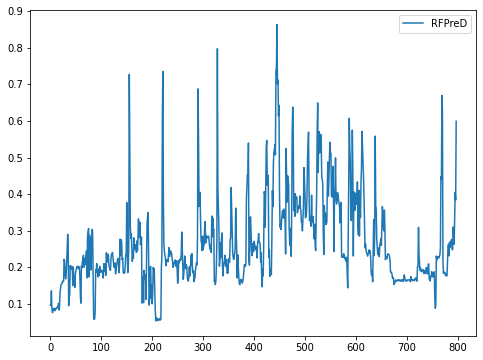

In [17]:
data_test.columns=['A','B','C','D','E','F','G']
xx = data_test[['A','B','C','D','E','F','G']]
# xx=sm.add_constant(xx)
from matplotlib import pyplot as plt
y_test = RF.predict(xx)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y_test, '-',label='RFPreD')
ax.legend(loc='best')

In [18]:
# y_test.to_excel("test_pls.xlsx")
y_test = pd.DataFrame(y_test)
y_test.index = np.linspace(1,798,798)
y_test.to_csv("test_RF.csv")

In [20]:
fgnb = pd.read_csv("test_RF.csv", dtype=np.float32)
print(fgnb.columns)
fgnbfgnb = fgnb[fgnb.columns[1]]
print(np.shape(fgnbfgnb))
MSE = metrics.mean_squared_error(fgnbfgnb, y_test)
print("MSE  ->", MSE)
RMSE = metrics.mean_squared_error(fgnbfgnb, y_test)**0.5
print("RMSE ->", RMSE)

Index(['Unnamed: 0', '0'], dtype='object')
(798,)
MSE  -> 5.555626675931877e-17
RMSE -> 7.453607633845422e-09
